In [124]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Chapter 3: Classification
#### 2021-01-30

In [19]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [3]:
mnist = fetch_openml('mnist_784',version =1)

In [5]:
X, y =mnist['data'], mnist['target']

In [8]:
import numpy as np
from matplotlib import pyplot as plt

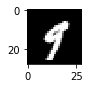

In [80]:
x=np.array(X.iloc[36000]).reshape(28,28)
plt.imshow(x, cmap='gray', interpolation='nearest', vmin=0, vmax=256)
plt.rcParams["figure.figsize"] = (1,1)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = X.iloc[:60000],X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

In [21]:
shuffle_index = np.random.permutation(60000)

In [23]:
X_train.iloc[shuffle_index]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y_train.iloc[shuffle_index]

48834    0
43655    6
9460     6
10993    3
17349    0
        ..
16753    9
36055    0
1508     4
3972     5
8670     2
Name: class, Length: 60000, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [25]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_train, y_train = X_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

In [50]:
y_train_5 =y_train=='5'
y_test_5 = y_test=='5'

In [51]:
y_train_5

48834    False
43655    False
9460     False
10993    False
17349    False
         ...  
16753    False
36055    False
1508     False
3972      True
8670     False
Name: class, Length: 60000, dtype: bool

In [52]:
y_test_5

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

### SGD Classifier

In [53]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [64]:
sgd_clf.predict([X.iloc[36000]])

array([False])

In [63]:
y.iloc[36000]

'9'

#### measure accuracy using cross-validation

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.96945, 0.95155, 0.9611 ])

In [66]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [67]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.9115 , 0.9071 , 0.91035])

#### Confusion matrix

In [68]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [70]:
y_train_pred.shape

(60000,)

In [93]:
y_train_5

48834    False
43655    False
9460     False
10993    False
17349    False
         ...  
16753    False
36055    False
1508     False
3972      True
8670     False
Name: class, Length: 60000, dtype: bool

In [125]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score
print("Confusion Matrix: \n", confusion_matrix(y_train_5, y_train_pred))
print("Precision score: ", precision_score(y_train_5, y_train_pred))
print("Recall score: ", recall_score(y_train_5, y_train_pred))
print("F1 score: ", f1_score(y_train_5,y_train_pred))

Confusion Matrix: 
 [[53579  1000]
 [ 1358  4063]]
Precision score:  0.8024886430969781
Recall score:  0.7494927135214905
F1 score:  0.7750858450972912


In [88]:
y_scores = cross_val_predict(sgd_clf, X_train,y_train_5, cv=3, method = "decision_function")

In [94]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [95]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label = "Precisiion")
    plt.plot(thresholds, recalls[:-1],'g-',label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])

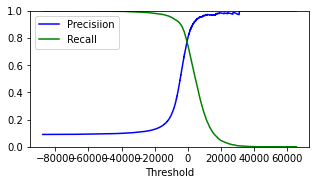

In [117]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.rcParams["figure.figsize"] = (5,2.5)
plt.show()

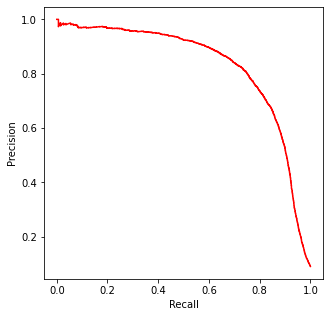

In [115]:
plt.plot(recalls, precisions, 'r-')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.rcParams['figure.figsize']=(5,5)
plt.show()

In [118]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [121]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('Fasle Positive Rate')
    plt.ylabel('True Positive Rate')

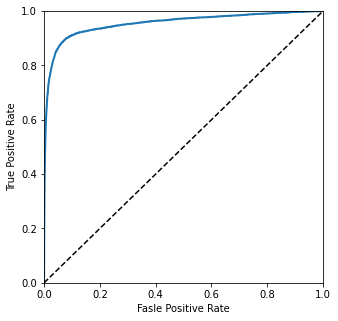

In [123]:
plot_roc_curve(fpr,tpr)
plt.rcParams['figure.figsize']=(5,5)
plt.show()

In [126]:
roc_auc_score(y_train_5,y_scores)

0.9545292170679356

### Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf_clf = RandomForestClassifier(random_state =42)

In [129]:
y_probas_rf = cross_val_predict(rf_clf, X_train, y_train_5,cv=3, method = "predict_proba")

In [132]:
y_scores_rf = y_probas_rf[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5,y_scores_rf)

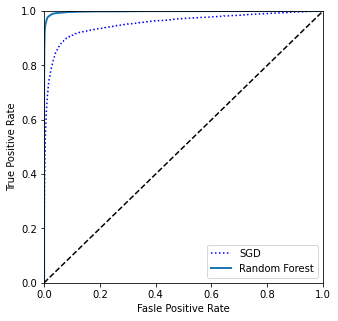

In [135]:
plt.plot(fpr,tpr,"b:",label='SGD')
plot_roc_curve(fpr_rf, tpr_rf,"Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [136]:
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train_5,y_scores_rf)

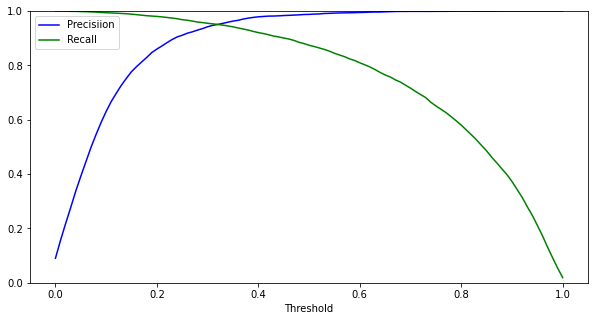

In [138]:
plot_precision_recall_vs_threshold(precisions_rf, recalls_rf, thresholds_rf)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [139]:
y_train_pred_rf = cross_val_predict(rf_clf,X_train,y_train_5,cv=3)

In [141]:
precision_score(y_train_5,y_train_pred_rf)

0.9886721208307111

In [142]:
recall_score(y_train_5,y_train_pred_rf)

0.8693967902600996